# Assignment CIE 5703 - week 6

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

## Rotterdam rain gauge dataset 10 min data from 2003 - 2014

Read in data

In [2]:
data = pd.read_csv('rotterdam_rg_2003-2014.csv', skipinitialspace=True)

Convert the dates to a readable format...

In [3]:
dates = data['Datum']
time = data['Tijd']
dates = dates.map(str)
date_split = dates.str.extract('(.{4})(.{2})(.{2})', expand=True)

time=time.apply(lambda x: '%04d' % x)
time_split = time.str.extract('(.{2})(.{2})', expand=True)

date_split.loc[:,3] = time_split.loc[:,0]
date_split.loc[:,4] = time_split.loc[:,1]

data.loc[:,'dt'] = pd.to_datetime(dict(year=date_split[0], month=date_split[1], day=date_split[2], hour=date_split[3], minute=date_split[4]))
data.index=data['dt']
data.head()

,Datum,Tijd,R10m,dt
dt,,,,
2003-04-01 00:10:00,20030401,10,0.0,2003-04-01 00:10:00
2003-04-01 00:20:00,20030401,20,0.0,2003-04-01 00:20:00
2003-04-01 00:30:00,20030401,30,0.0,2003-04-01 00:30:00
2003-04-01 00:40:00,20030401,40,0.0,2003-04-01 00:40:00
2003-04-01 00:50:00,20030401,50,0.0,2003-04-01 00:50:00


Plot all data

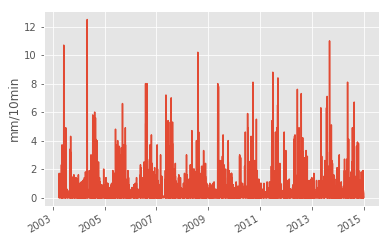

In [4]:
plt.plot(data['dt'], data["R10m"])
plt.ylabel('mm/10min')
plt.gcf().autofmt_xdate()

Resample the 10 min dataset to hourly accumulated data

In [5]:
data_1h = pd.DataFrame()
data_1h['mean_rain'] = data.R10m.resample('H').mean()
data_1h['accum_rain'] = data.R10m.resample('H').sum()

In [6]:
data_1h.tail()

,mean_rain,accum_rain
dt,,
2014-12-31 19:00:00,0.0,0.0
2014-12-31 20:00:00,0.0,0.0
2014-12-31 21:00:00,0.0,0.0
2014-12-31 22:00:00,0.0,0.0
2014-12-31 23:00:00,0.0,0.0


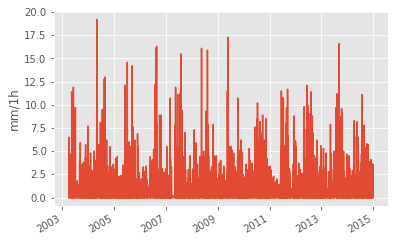

In [7]:
plt.plot(data_1h["accum_rain"])
plt.ylabel('mm/1h')
plt.gcf().autofmt_xdate()

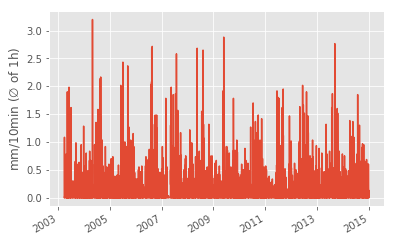

In [8]:
plt.plot(data_1h["mean_rain"])
plt.ylabel(r'mm/10min ($\varnothing$ of 1h)')
plt.gcf().autofmt_xdate()

Resample 10 min dataset to 24 accumulated data

In [9]:
data_24h = pd.DataFrame()
data_24h['mean_rain'] = data.R10m.resample('D').mean()
data_24h['accum_rain'] = data.R10m.resample('D').sum()

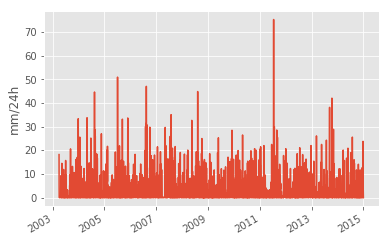

In [10]:
plt.plot(data_24h["accum_rain"])
plt.ylabel('mm/24h')
plt.gcf().autofmt_xdate()

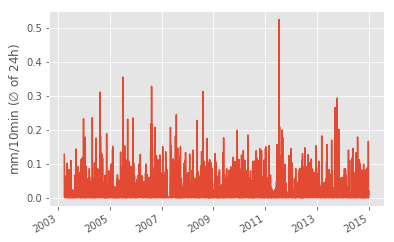

In [11]:
plt.plot(data_24h["mean_rain"])
plt.ylabel(r'mm/10min ($\varnothing$ of 24h)')
plt.gcf().autofmt_xdate()

Select summer and winter months as separate datasets

In [12]:
data_summer_1h = data_1h.loc[(data_1h.index.month>=4) & (data_1h.index.month<=9)]

mask_start = (data_1h.index.month >= 1) & (data_1h.index.month <= 3)
mask_end = (data_1h.index.month >= 10) & (data_1h.index.month <= 12)
mask = mask_start | mask_end

data_winter_1h = data_1h.loc[mask]

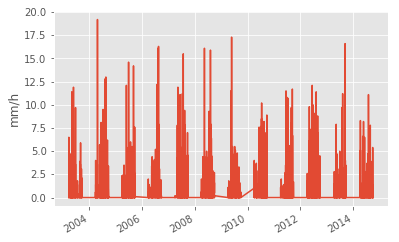

In [13]:
plt.plot(data_summer_1h["accum_rain"])
plt.ylabel('mm/h')
plt.gcf().autofmt_xdate()

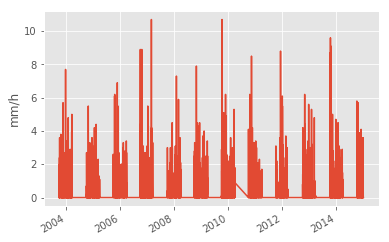

In [14]:
plt.plot(data_winter_1h["accum_rain"])
plt.ylabel('mm/h')
plt.gcf().autofmt_xdate()

Resample 10 min rain data to monthly accumulated data

In [15]:
data_monthly = pd.DataFrame()
data_monthly['mean_rain'] = data.R10m.resample('M').mean()
data_monthly['accum_rain'] = data.R10m.resample('M').sum()

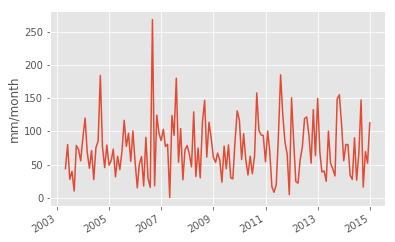

In [16]:
plt.plot(data_monthly["accum_rain"])
plt.ylabel('mm/month')
plt.gcf().autofmt_xdate()

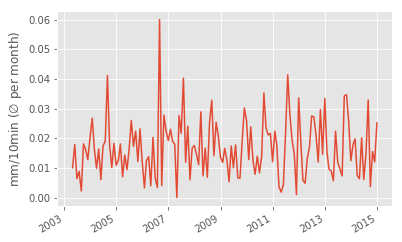

In [17]:
plt.plot(data_monthly["mean_rain"])
plt.ylabel(r'mm/10min ($\varnothing$ per month)')
plt.gcf().autofmt_xdate()

## Answering the assignments

#### 1. General statistics for 24-hour and 10-min datasets: compute mean, standard deviation, skewness; plot histograms

##### 10 min dataset

In [18]:
print('Mean: %s' % str(data.R10m.mean()))
print('Std: %s' % str(data.R10m.std()))
print('Skew: %s' % str(data.R10m.skew()))

Mean: 0.0167865594937
Std: 0.123820374739
Skew: 25.838498931


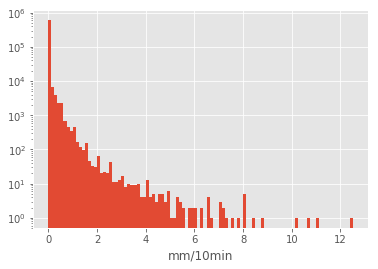

In [19]:
data.R10m.hist(bins = 100)
plt.xlabel('mm/10min')
plt.gca().set_yscale("log")

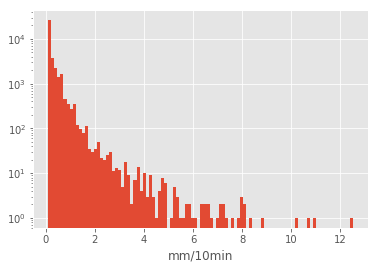

In [20]:
cur_data = data.R10m.loc[data.R10m>0]
hist_d = plt.hist(cur_data, bins=100)
plt.xlabel('mm/10min')
plt.gca().set_yscale("log")

##### 24 h dataset

In [21]:
print('Mean: %s' % str(data_24h.accum_rain.mean()))
print('Std: %s' % str(data_24h.accum_rain.std()))
print('Skew: %s' % str(data_24h.accum_rain.skew()))

Mean: 2.41726065688
Std: 4.94003678295
Skew: 3.9313163136


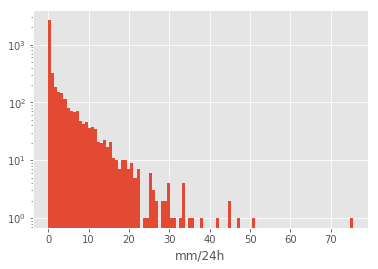

In [22]:
data_24h.accum_rain.hist(bins = 100)
plt.gca().set_yscale("log")
plt.xlabel('mm/24h')

Ignoring zeros:

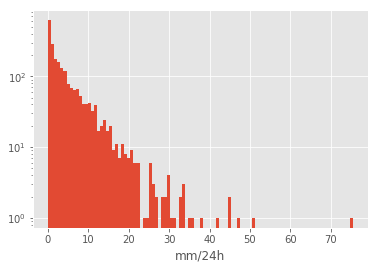

In [23]:
cur_data = data_24h.accum_rain.loc[data_24h.accum_rain>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")
plt.xlabel('mm/24h')

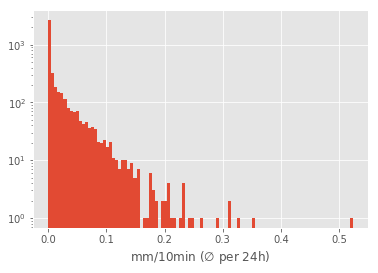

In [24]:
data_24h.mean_rain.hist(bins = 100)
plt.xlabel(r'mm/10min ($\varnothing$ per 24h)')
plt.gca().set_yscale("log")

In [25]:
selected_monthly_data = data_monthly
#selected_monthly_data = data_monthly[(data_monthly.index >= '2004-01-01')]
selected_monthly_data.head()

,mean_rain,accum_rain
dt,,
2003-04-30,0.010141,43.8
2003-05-31,0.017921,80.0
2003-06-30,0.006435,27.8
2003-07-31,0.008871,39.6
2003-08-31,0.002263,10.1


### 2. a. Analysis of seasonal cycles: create boxplots for monthly totals across all year

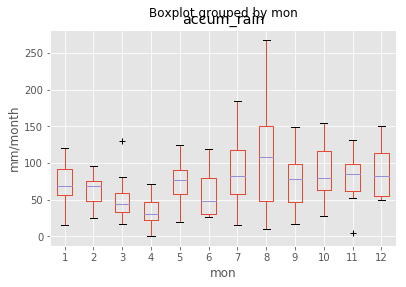

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
selected_monthly_data['mon'] = selected_monthly_data.index.month
selected_monthly_data['year'] = selected_monthly_data.index.year
selected_monthly_data.boxplot(column=['accum_rain'], by='mon', sym='+')
plt.ylabel('mm/month')

Or per year:

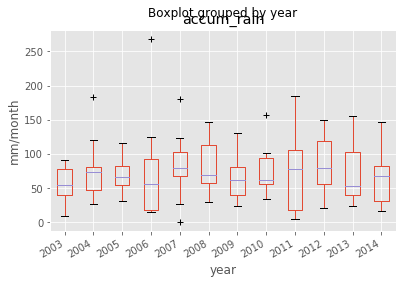

In [27]:
selected_monthly_data.boxplot(column=['accum_rain'], by='year', sym='+')
plt.ylabel('mm/month')
plt.gcf().autofmt_xdate()

### 2. b. Analysis of diurnal cycles: create boxplots for hourly totals for entire dataseries

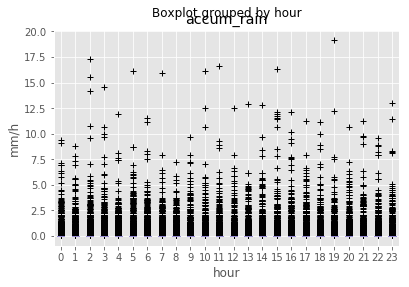

In [28]:
data_1h['hour'] = data_1h.index.hour
data_1h.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <1mm/h

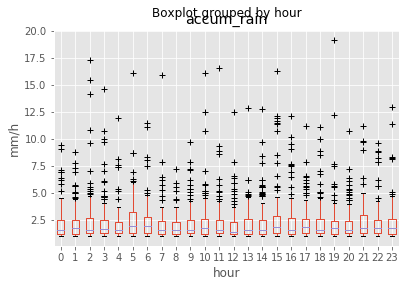

In [29]:
cur_df = data_1h.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events < 3mm/h

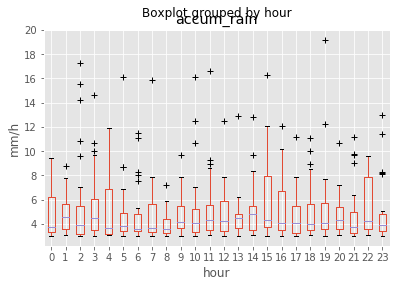

In [30]:
cur_df = data_1h.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

### 2. c. Variation of diurnal cycles with seasons: create boxplots for hourly totals for summer season (April – September) and for winter season (October-March)

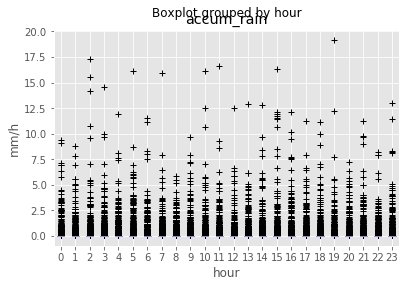

In [31]:
data_summer_1h['hour'] = data_summer_1h.index.hour
data_summer_1h.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <1mm/h

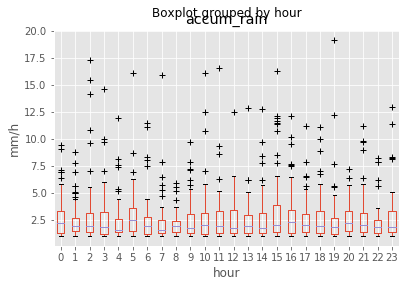

In [32]:
cur_df = data_summer_1h.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <3mm/h

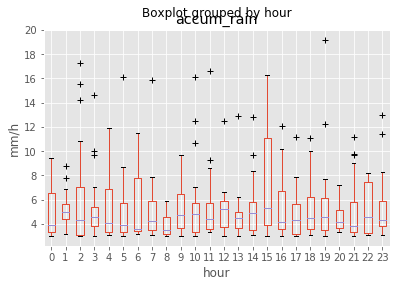

In [33]:
cur_df = data_summer_1h.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Repeat with winter

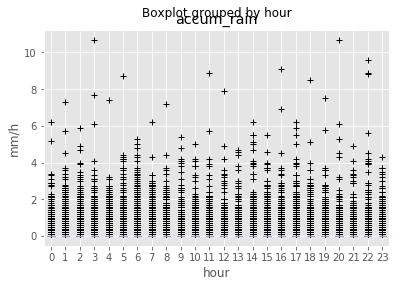

In [34]:
data_winter_1h['hour'] = data_winter_1h.index.hour
data_winter_1h.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <1mm/h

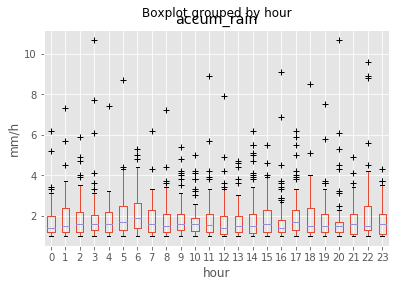

In [35]:
cur_df = data_winter_1h.copy()
cur_df.loc[cur_df.accum_rain<1, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

Neglecting events <3mm/h

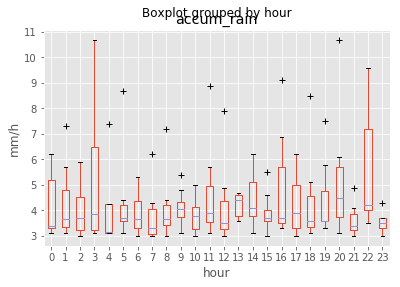

In [36]:
cur_df = data_winter_1h.copy()
cur_df.loc[cur_df.accum_rain<3, 'accum_rain'] = np.nan
cur_df.boxplot(column=['accum_rain'], by='hour', sym='+')
plt.ylabel('mm/h')

### 2. d. Diurnal cycles of intense storm events: Count nr of exceedances above 10 mm/h threshold for each hour of the day, for entire data series and for summer months only

Show rainfall events > 10mm /h over entire 1h accumulated dataset

In [37]:
rotterdam_1h_exceeds = data_1h.accum_rain[data_1h.accum_rain>10]

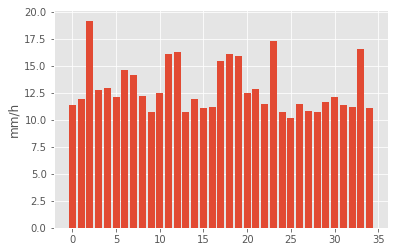

In [38]:
y = np.array(rotterdam_1h_exceeds)
N = len(y)
x = range(N)
plt.bar(x, y)
plt.ylabel('mm/h')

Amount of events 

In [39]:
print(len(rotterdam_1h_exceeds))

35


Events in summer

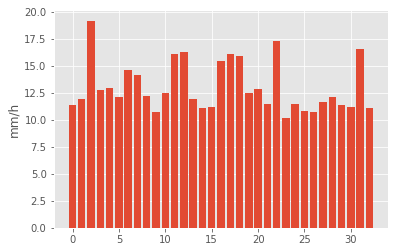

In [40]:
rotterdam_1h_exceeds_summer = data_summer_1h.accum_rain[data_summer_1h.accum_rain>10]

y = np.array(rotterdam_1h_exceeds_summer)
N = len(y)
x = range(N)
plt.bar(x, y)
plt.ylabel('mm/h')

Amount of events

In [41]:
print(len(rotterdam_1h_exceeds_summer))

33


#### 3. Fit GEV-distribution for POT values in the time series

#### 3. a. Create plots: histogram and GEV fit and interpret

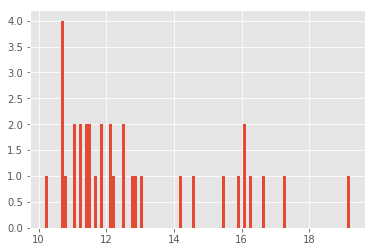

In [42]:
exceed_hist = plt.hist(rotterdam_1h_exceeds, bins=100)

In [43]:
from scipy.stats import genextreme

In [44]:
x = np.linspace(10, 30, 1000)
y = np.array(rotterdam_1h_exceeds[:])

In [45]:
np.seterr(divide='ignore', invalid='ignore')
genextreme.fit(y)

(-0.39745385306120329, 11.610039665221832, 1.2282838314272664)

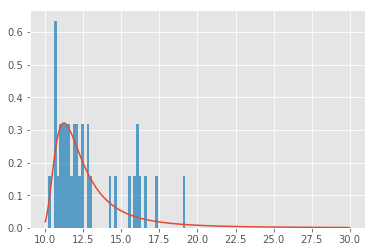

In [46]:
np.seterr(divide='ignore', invalid='ignore')
pdf = plt.plot(x, genextreme.pdf(x, *genextreme.fit(y)))
pdf_hist = plt.hist(y, bins=50, normed=True, histtype='stepfilled', alpha=0.8)

#### 3. c. Compute rainfall amounts associated with return periods of 1 year, 10 years and 100 years

In [47]:
genextreme.ppf((1-1/1), *genextreme.fit(y))

8.5196586764177678

In [48]:
genextreme.ppf((1-1/10), *genextreme.fit(y))

16.078451860396761

In [49]:
genextreme.ppf((1-1/100), *genextreme.fit(y))

27.752925282695628

Lower since we're missing out the heavy rainfall events in 2015 and 2016 (only 10 year dataset)